In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import calendar

import warnings
warnings.filterwarnings('ignore')

In [38]:
labels = pd.read_csv("../data/labels.csv", index_col=0)

df_date = pd.read_csv("../data/assembled.csv", index_col=0)[['date']]
df_date['date'] = pd.to_datetime(df_date['date'])

df = df_date.join(labels).set_index('date')

### In this notebook, I would like to investigate the citations distribution with respect to the time and make the corresponding inferences

before doing that let's recall what is the total amount of telegrams per year / month

In [125]:
months = [calendar.month_name[number] for number in [*range(1, 13)]]

In [155]:
telegrams_year = df.groupby([df.index.year]).count()
telegrams_month = df.groupby([df.index.month]).count()

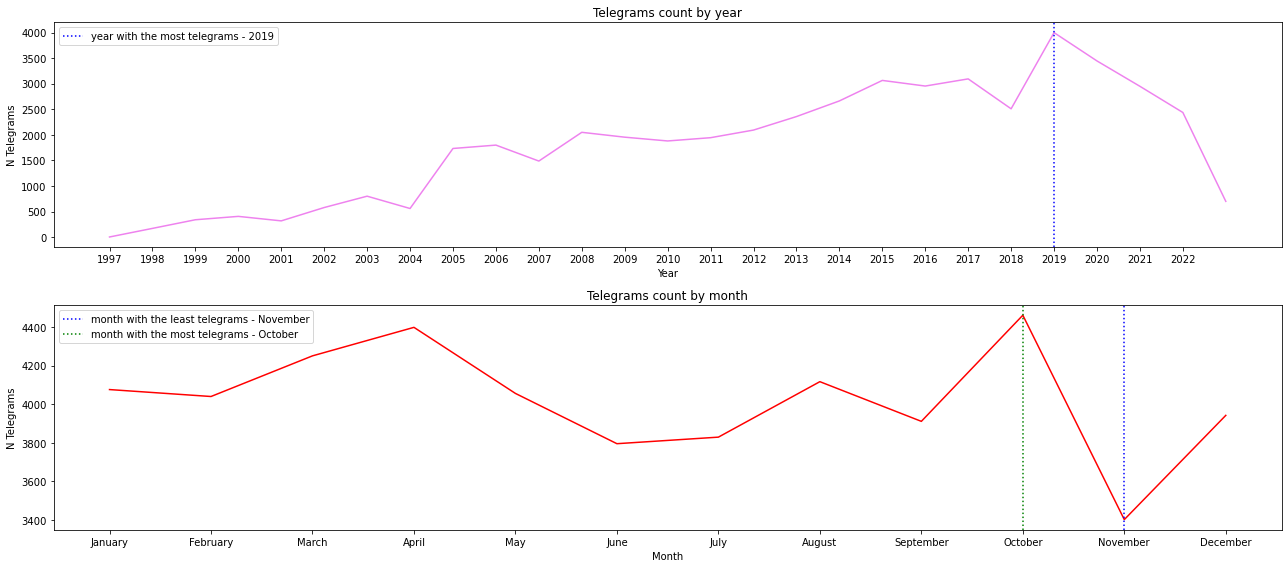

In [192]:
plt.rcParams["figure.figsize"] = (18, 8)

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(telegrams_year.index, telegrams_year.citation_class, color='violet')
ax[0].axvline(2019, color='blue', linestyle='dotted', label='year with the most telegrams - 2019') 

ax[1].plot(telegrams_month.index, telegrams_month.citation_class, color='red')
ax[1].axvline(11, color='blue', linestyle='dotted', label='month with the least telegrams - November') 
ax[1].axvline(10, color='green', linestyle='dotted', label='month with the most telegrams - October')

ax[0].set_title("Telegrams count by year")
ax[0].set_ylabel("N Telegrams")
ax[0].set_xlabel("Year")
ax[0].set_xticks([*range(citations_by_year.index.min(), citations_by_year.index.max())])
ax[0].legend()

ax[1].set_title("Telegrams count by month")
ax[1].set_ylabel("N Telegrams")
ax[1].set_xlabel("Month")
ax[1].set_xticks([*range(1, 13)])
ax[1].set_xticklabels(months)
ax[1].legend()

fig.tight_layout()
fig.show()

#### Now check the citation rate - time relation

In [185]:
citations_by_year = df.groupby([df.index.year]).agg({'n_cited': 'sum'})

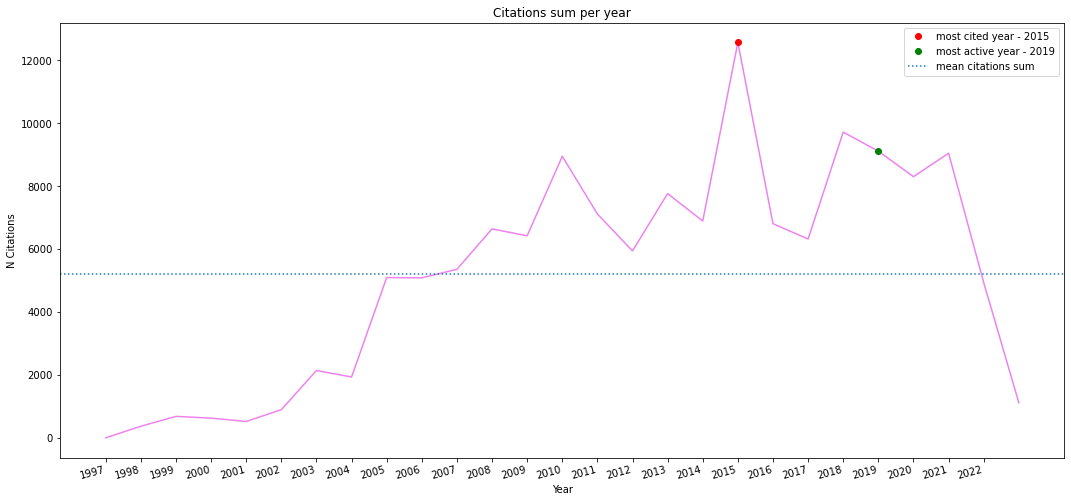

In [186]:
plt.rcParams["figure.figsize"] = (18, 8)
sns.lineplot(y='n_cited', x='date', data=citations_by_year, color='violet')
plt.plot(2015, citations_by_year.loc[2015].n_cited, 'bo', color='red', label='most cited year - 2015') 
plt.plot(2019, citations_by_year.loc[2019].n_cited, 'bo', color='green', label='most active year - 2019') 
plt.axhline(citations_by_year.n_cited.mean(), linestyle='dotted', label='mean citations sum')
plt.legend()
plt.title("Citations sum per year")
plt.ylabel("N Citations")
plt.xlabel("Year")
plt.xticks([*range(citations_by_year.index.min(), citations_by_year.index.max())])
plt.xticks(rotation=15, ha='right')
plt.show()

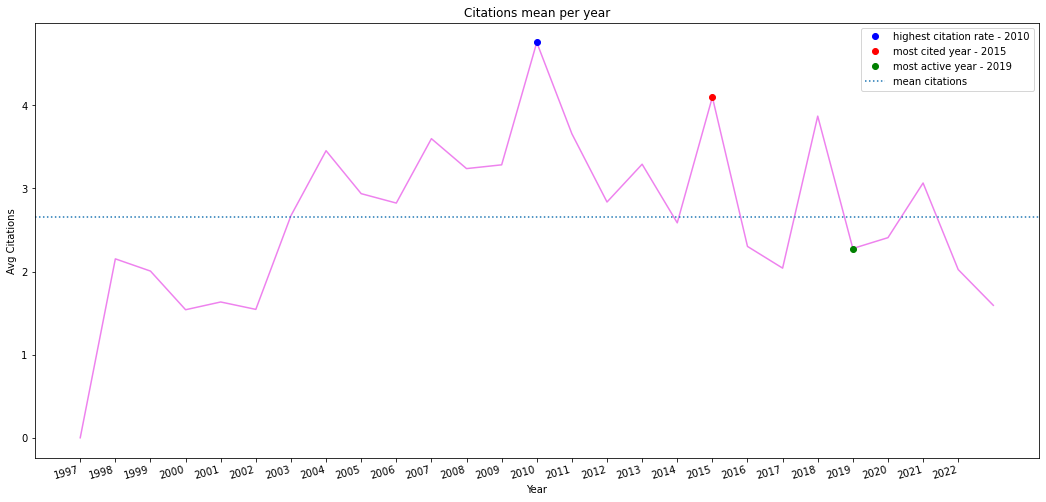

In [187]:
citations_by_year = df.groupby([df.index.year]).agg({'n_cited': 'mean'})
plt.rcParams["figure.figsize"] = (18, 8)
sns.lineplot(y='n_cited', x='date', data=citations_by_year, color='violet')
plt.plot(2010, citations_by_year.loc[2010].n_cited, 'bo', color='blue', label='highest citation rate - 2010') 
plt.plot(2015, citations_by_year.loc[2015].n_cited, 'bo', color='red', label='most cited year - 2015') 
plt.plot(2019, citations_by_year.loc[2019].n_cited, 'bo', color='green', label='most active year - 2019') 
plt.axhline(citations_by_year.n_cited.mean(), linestyle='dotted', label='mean citations')
plt.legend()
plt.title("Citations mean per year")
plt.ylabel("Avg Citations")
plt.xlabel("Year")
plt.xticks([*range(citations_by_year.index.min(), citations_by_year.index.max())])
plt.xticks(rotation=15, ha='right')
plt.show()

In [188]:
citations_by_month = df.groupby([df.index.month]).agg({'n_cited': 'sum'})

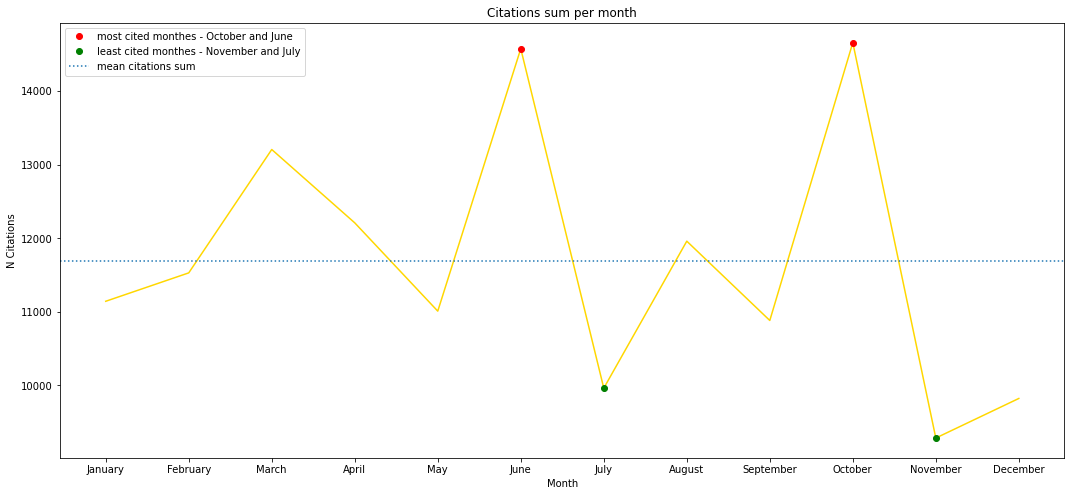

In [189]:
plt.rcParams["figure.figsize"] = (18, 8)
sns.lineplot(y='n_cited', x='date', data=citations_by_month, color='gold', alpha=1)
plt.plot(10, citations_by_month.loc[10].n_cited, 'bo', color='red', label='most cited monthes - October and June') 
plt.plot(6, citations_by_month.loc[6].n_cited, 'bo', color='red')
plt.plot(11, citations_by_month.loc[11].n_cited, 'bo', color='green', label='least cited monthes - November and July')
plt.plot(7, citations_by_month.loc[7].n_cited, 'bo', color='green')
plt.axhline(citations_by_month.n_cited.mean(), linestyle='dotted', label='mean citations sum')
plt.legend()
plt.title("Citations sum per month")
plt.ylabel("N Citations")
plt.xlabel("Month")
plt.xticks([*range(1, 13)], labels=months)
plt.show()

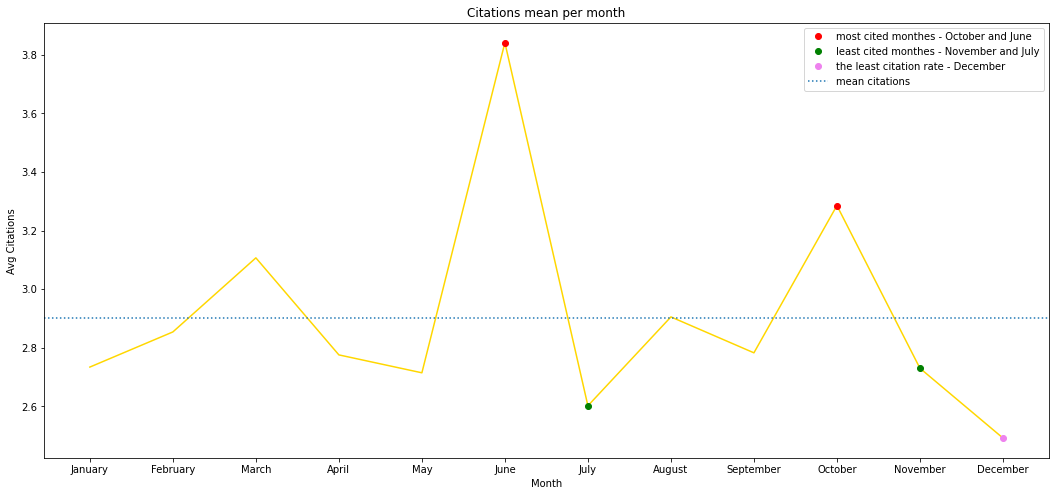

In [190]:
citations_by_month = df.groupby([df.index.month]).agg({'n_cited': 'mean'})

plt.rcParams["figure.figsize"] = (18, 8)
sns.lineplot(y='n_cited', x='date', data=citations_by_month, color='gold', alpha=1)
plt.plot(10, citations_by_month.loc[10].n_cited, 'bo', color='red', label='most cited monthes - October and June') 
plt.plot(6, citations_by_month.loc[6].n_cited, 'bo', color='red')
plt.plot(11, citations_by_month.loc[11].n_cited, 'bo', color='green', label='least cited monthes - November and July')
plt.plot(7, citations_by_month.loc[7].n_cited, 'bo', color='green')
plt.plot(12, citations_by_month.loc[12].n_cited, 'bo', color='violet', label='the least citation rate - December')
plt.axhline(citations_by_month.n_cited.mean(), linestyle='dotted', label=f'mean citation rate: {citations_by_month.n_cited.mean()}')
plt.legend()
plt.title("Citations mean per month")
plt.ylabel("Avg Citations")
plt.xlabel("Month")
plt.xticks([*range(1, 13)], labels=months)
plt.show()

#### A few conclusions:
- There was noticable less citations (both sum and mean) in the old telegrams before the 2005. Probably the telegram websites were not that much popular before. 
- A significant citation drop in 2022 is noticable.
- A month can be a good feature - there are monthes with more citations and monthes with less. Probably it is related to the periods where some interesting astronomical evens are more / less visible or are obserable more / less frequent

### Check the relation between the time and the class labels

In [191]:
citation_classes_by_year = df.groupby([df.index.year, df.citation_class]).count()
#citation_classes_by_year

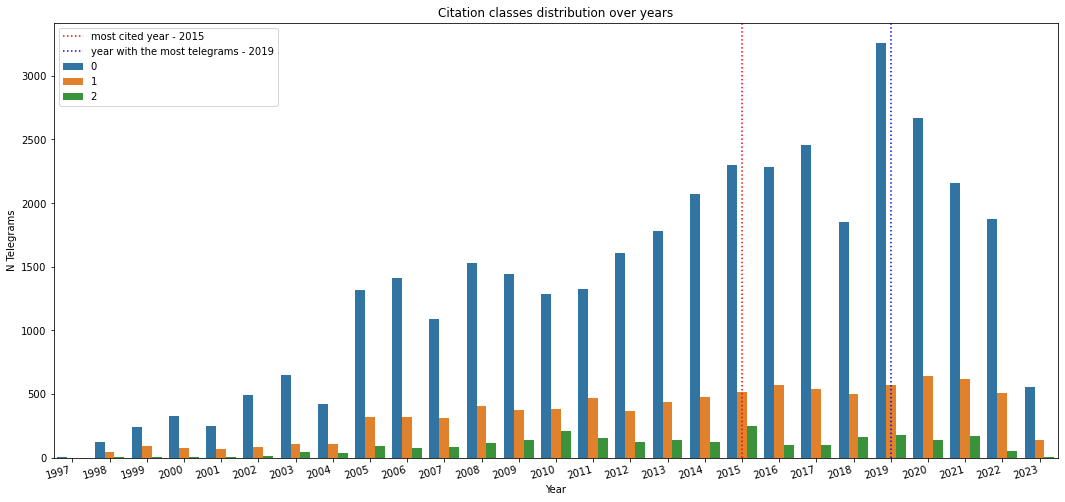

In [109]:
sns.barplot(y='n_cited', x='date', data=citation_classes_by_year.reset_index(), hue='citation_class')
plt.axvline(18, color='red', linestyle='dotted', label='most cited year - 2015') 
plt.axvline(22, color='blue', linestyle='dotted', label='year with the most telegrams - 2019') 
plt.xticks(rotation=15, ha='right')
plt.legend(loc='upper left')
plt.title("Citation classes distribution over years")
plt.xlabel("Year")
plt.ylabel("N Telegrams")
plt.show()

In [114]:
citation_classes_by_month = df.groupby([df.index.month, df.citation_class]).count()

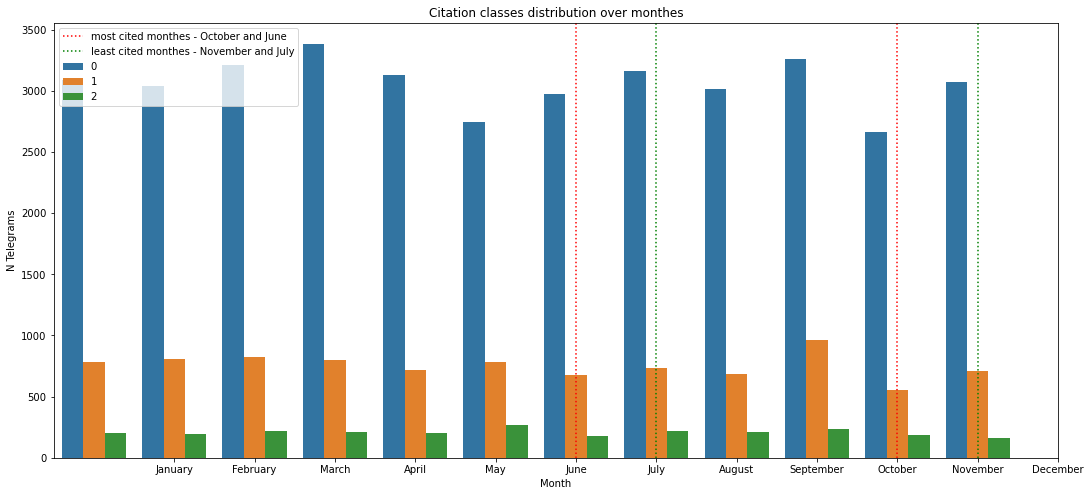

In [117]:
sns.barplot(y='n_cited', x='date', data=citation_classes_by_month.reset_index(), hue='citation_class')
plt.axvline(10, linestyle='dotted', color='red', label='most cited monthes - October and June') 
plt.axvline(6, linestyle='dotted', color='red')
plt.axvline(11, linestyle='dotted', color='green', label='least cited monthes - November and July')
plt.axvline(7, linestyle='dotted', color='green')
plt.xticks([*range(1, 13)], labels=months)
plt.legend(loc='upper left')
plt.title("Citation classes distribution over monthes")
plt.xlabel("Month")
plt.ylabel("N Telegrams")
plt.show()

 - The year 2015 is the most cited, there are more telegrams in 2019
 - The total amount of the telegrams in pretty the same for all the monthes, despite June and October get much more citations

In [213]:
citations_by_year = df.groupby([df.index.year]).agg({'n_cited': 'mean'})
citations_by_month = df.groupby([df.index.month]).agg({'n_cited': 'mean'})
m1 = citations_by_year.n_cited.mean()
m2 = citations_by_month.n_cited.mean()

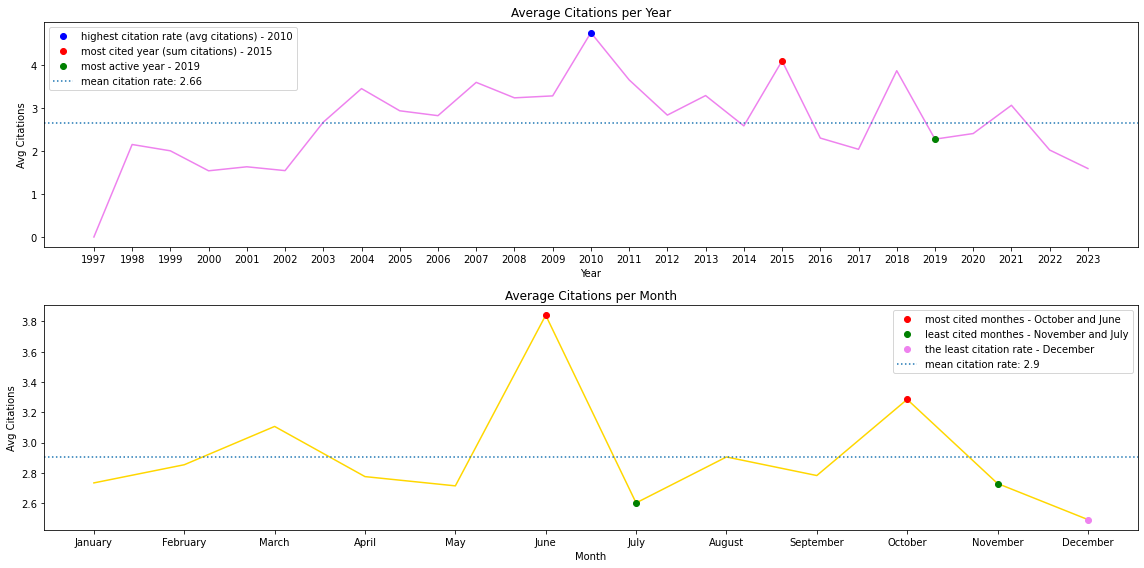

In [217]:
plt.rcParams["figure.figsize"] = (16, 8)

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(citations_by_year.reset_index().date, citations_by_year.n_cited, color='violet')
ax[0].plot(2010, citations_by_year.loc[2010].n_cited, 'bo', color='blue', label='highest citation rate (avg citations) - 2010') 
ax[0].plot(2015, citations_by_year.loc[2015].n_cited, 'bo', color='red', label='most cited year (sum citations) - 2015') 
ax[0].plot(2019, citations_by_year.loc[2019].n_cited, 'bo', color='green', label='most active year - 2019') 
ax[0].axhline(citations_by_year.n_cited.mean(), linestyle='dotted', label=f'mean citation rate: {round(m1, 2)}')
ax[0].legend()
ax[0].set_title("Average Citations per Year")
ax[0].set_ylabel("Avg Citations")
ax[0].set_xlabel("Year")
ax[0].set_xticks([*range(citations_by_year.index.min(), citations_by_year.index.max()+1)])


ax[1].plot(citations_by_month.reset_index().date, citations_by_month.n_cited, color='gold')
ax[1].plot(10, citations_by_month.loc[10].n_cited, 'bo', color='red', label='most cited monthes - October and June') 
ax[1].plot(6, citations_by_month.loc[6].n_cited, 'bo', color='red')
ax[1].plot(11, citations_by_month.loc[11].n_cited, 'bo', color='green', label='least cited monthes - November and July')
ax[1].plot(7, citations_by_month.loc[7].n_cited, 'bo', color='green')
ax[1].plot(12, citations_by_month.loc[12].n_cited, 'bo', color='violet', label='the least citation rate - December')
ax[1].axhline(citations_by_month.n_cited.mean(), linestyle='dotted', label=f'mean citation rate: {round(m2, 2)}')
ax[1].legend()
ax[1].set_title("Average Citations per Month")
ax[1].set_ylabel("Avg Citations")
ax[1].set_xlabel("Month")
ax[1].set_xticks([*range(1, 13)])
ax[1].set_xticklabels(months)
ax[1].legend()

fig.tight_layout()
fig.show()